In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA 
from sklearn import metrics


from matplotlib_venn import venn2, venn2_circles, venn3
from itertools import chain 

In [2]:
gastric_df = pd.read_csv('data/processed/gastric_sampleonly.csv')

In [3]:
PBMC_df = pd.read_excel('data/processed/activated_PBMC_trimmed.xls')

In [4]:
#Venn diagram function to calculate overlap proteins from two separate lists
#and return dataframe which includes those overlapping proteins
#Dataframe is nested and list(chain.from_iterable(list_name)) must be used to 
#pull this back out into a list format 

def venn_diagram(a,b, labels=['A','B']):
    
    a = list(set(a))
    b = list(set(b)) 
    
    only_a = len( [x for x in a if x not in b] )
    only_b = len( [x for x in b if x not in a] )
    
    both = np.intersect1d(a, b)
    a_b = len( both ) 
    both = pd.DataFrame(both)
    
    
    plt.figure(figsize=(19.20,10.80))
    
    c = venn2(subsets=(only_a, only_b, a_b), set_labels = labels)
    
    
    c.get_patch_by_id('10').set_color('red')
    c.get_patch_by_id('01').set_color('blue')
    
    for text in c.set_labels:
        text.set_fontsize(18)
    for text in c.subset_labels: 
        text.set_fontsize(18)
    
    c.get_patch_by_id('10').set_edgecolor('none')
    c.get_patch_by_id('01').set_edgecolor('none')
    c.get_patch_by_id('10').set_alpha(0.4)
    c.get_patch_by_id('01').set_alpha(0.4)
    
    #Will get error in this step if no overlapping proteins
    #but will still return the plot 
    c.get_patch_by_id('11').set_color('magenta')
    c.get_patch_by_id('11').set_edgecolor('none')
    c.get_patch_by_id('11').set_alpha(0.4)
    
    
    plt.show()
    print('Number of overlapping proteins:', a_b)
    
    return both

In [5]:
#Get gastric data into list format to use with venn diagram funciton

gastric_list = gastric_df['ID'].tolist()

In [6]:
#Separate PBMC data by activation state

PBMC_both = PBMC_df.loc[PBMC_df['found'] == 'both']
PBMC_act = PBMC_df.loc[PBMC_df['found'] == 'activated']
PBMC_both_act = [PBMC_both, PBMC_act]

PBMC_both_act_df = pd.concat(PBMC_both_act, axis = 0)

PBMC_ID = PBMC_both_act_df['accession']

PBMC_ID_list = PBMC_ID.values.tolist()


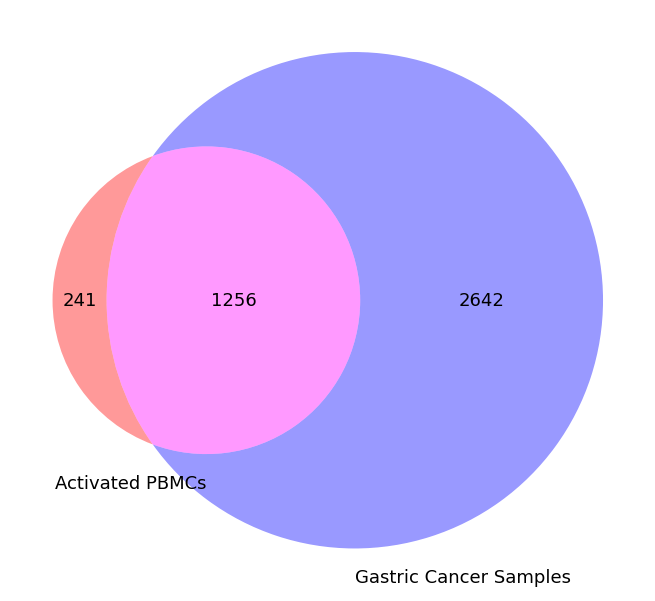

Number of overlapping proteins: 1256


In [7]:
#venn diagram function to get proteins overlapping between gastric cancer dataset
#and activated PBMC dataset 

overlap = venn_diagram(PBMC_ID_list, gastric_list, labels=['Activated PBMCs', 'Gastric Cancer Samples'])

In [8]:
display(overlap)

,0
0,A5YKK6
1,A6NHR9
2,B0I1T2
3,O00148
4,O00151
...,...
1251,Q9Y6B6
1252,Q9Y6C2
1253,Q9Y6C9
1254,Q9Y6E0


In [9]:
# Pull out overlapping proteins from gastric dataset 

overlap_list = overlap.values.tolist()

overlap_list = list(chain.from_iterable(overlap_list))

overlap_df = pd.DataFrame({'ID': overlap_list}).merge(gastric_df) 
display(overlap_df)

,ID,NC1 Log2,NC2 Log2,NC3 Log2,NC4 Log2,GC1 Log2,GC2 Log2,GC3 Log2,GC4 Log2,PL1 Log2,PL2 Log2,PL3 Log2,PL4 Log2
0,A5YKK6,-0.193547,-0.168877,-0.025199,0.058040,-0.053062,0.304052,0.089036,0.068684,-0.029549,0.301525,0.058988,0.025843
1,A6NHR9,-0.145977,-0.078709,-0.170041,-0.147131,-0.173992,-0.298794,-0.261918,-0.229888,-0.160144,-0.183454,-0.157527,-0.105997
2,B0I1T2,-0.456015,-0.371589,-0.424671,-0.501332,-0.605081,-0.878919,-0.754149,-0.705902,-0.467162,-0.850963,-0.574704,-0.609803
3,O00148,-0.043228,-0.198784,-0.110602,-0.166178,-0.055080,0.148954,0.134185,-0.040260,-0.311928,-0.246245,-0.340989,-0.237252
4,O00151,1.355884,1.353680,1.327898,1.325218,1.595215,1.603375,1.649124,1.609566,1.375147,1.373797,1.376976,1.317938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,Q9Y6B6,-2.098086,-2.111881,-1.454927,-1.423777,-2.226082,-0.937019,-1.425260,-1.494387,-2.110250,-0.724834,-1.312943,-1.355800
1263,Q9Y6C2,1.772485,1.733780,1.798444,1.806320,1.714433,1.711994,1.643489,1.748314,1.691834,1.710682,1.687332,1.644788
1264,Q9Y6C9,0.279023,0.283078,0.261421,0.249907,0.263650,0.128827,0.148139,0.277505,0.234785,0.197977,0.219140,0.212874
1265,Q9Y6E0,0.203452,0.224487,0.172691,0.202531,0.415181,0.218727,0.354330,0.273424,0.285392,0.080500,0.197720,0.223303


In [10]:
# PCA on gastric data with proteins that overlap with activated PBMC dataset ('activated' only and 'both' proteins)

patients = ['NC1 Log2', 'NC2 Log2', 'NC3 Log2', 'NC4 Log2', 'GC1 Log2', 'GC2 Log2', 'GC3 Log2', 'GC4 Log2', 'PL1 Log2',
           'PL2 Log2', 'PL3 Log2', 'PL4 Log2']

overlap_df_t = pd.DataFrame.transpose(overlap_df)
display(overlap_df_t)

x = overlap_df_t.loc[patients, :].values 

x = StandardScaler().fit_transform(x)


,0,1,2,3,4,5,6,7,8,9,...,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266
ID,A5YKK6,A6NHR9,B0I1T2,O00148,O00151,O00160,O00170,O00194,O00217,O00231,...,Q9Y5S9,Q9Y5Y2,Q9Y5Z4,Q9Y678,Q9Y696,Q9Y6B6,Q9Y6C2,Q9Y6C9,Q9Y6E0,Q9Y6N5
NC1 Log2,-0.193547,-0.145977,-0.456015,-0.0432279,1.35588,-0.504926,0.318989,-0.692709,0.831626,0.947751,...,0.0816647,-0.169326,0.459006,1.36242,0.00903028,-2.09809,1.77249,0.279023,0.203452,1.47023
NC2 Log2,-0.168877,-0.0787086,-0.371589,-0.198784,1.35368,-0.480493,0.330484,-0.47801,0.695291,0.944686,...,0.0802093,-0.171062,0.493091,1.34454,-0.0435365,-2.11188,1.73378,0.283078,0.224487,1.44432
NC3 Log2,-0.0251992,-0.170041,-0.424671,-0.110602,1.3279,-0.539801,0.152286,0.20286,0.728017,0.925419,...,0.156727,-0.266782,0.376046,1.40308,0.132655,-1.45493,1.79844,0.261421,0.172691,1.48668
NC4 Log2,0.0580399,-0.147131,-0.501332,-0.166178,1.32522,-0.543286,0.159704,0.194398,0.690829,0.906768,...,0.129857,-0.280032,0.445284,1.41548,0.0982739,-1.42378,1.80632,0.249907,0.202531,1.49109
GC1 Log2,-0.0530616,-0.173992,-0.605081,-0.0550801,1.59521,-0.644178,0.350527,-0.265052,0.599435,0.929687,...,0.203608,-0.22337,0.520942,1.34923,0.0705686,-2.22608,1.71443,0.26365,0.415181,1.46283
GC2 Log2,0.304052,-0.298794,-0.878919,0.148954,1.60337,-0.617118,-0.0868026,0.618846,0.491655,0.79854,...,0.455492,-0.281291,0.395713,1.45252,0.211344,-0.937019,1.71199,0.128827,0.218727,1.54256
GC3 Log2,0.0890362,-0.261918,-0.754149,0.134185,1.64912,-0.457893,0.283533,0.0713432,0.48933,0.89451,...,0.379051,-0.212537,0.427585,1.35633,0.0495313,-1.42526,1.64349,0.148139,0.35433,1.47579
GC4 Log2,0.0686839,-0.229888,-0.705902,-0.0402603,1.60957,-0.575174,0.335341,0.0470026,0.5481,0.921507,...,0.247054,-0.1278,0.468853,1.39652,-0.0232632,-1.49439,1.74831,0.277505,0.273424,1.47932
PL1 Log2,-0.0295493,-0.160144,-0.467162,-0.311928,1.37515,-0.448461,0.327372,-0.469669,0.650079,0.950846,...,0.123997,-0.194597,0.419559,1.35028,0.015806,-2.11025,1.69183,0.234785,0.285392,1.37238


In [11]:
#PCA for 10 components

pca = PCA(n_components=10)

principalComponents = pca.fit_transform(x)

principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4',
                                                                 'principal component 5','principal component 6',
                                                                  'principal component 7','principal component 8',
                                                                 'principal component 9','principal component 10'], 
                          index = patients)

display(principalDF)

principalDF.index = range(len(principalDF.index)) 

display(principalDF)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
NC1 Log2,-29.289220,-3.598535,-12.646892,-9.432776,2.857060,2.445585,5.359462,-4.050254,-8.355903,1.195429
NC2 Log2,-27.388341,-0.818938,-5.873406,-4.521120,4.920784,3.480935,-2.234014,-0.346266,11.177260,-1.847081
NC3 Log2,-10.097127,16.024193,-14.204393,8.079646,-2.006806,-0.667737,-7.345073,-0.823542,-3.392049,-6.676615
NC4 Log2,-9.565457,16.309277,-14.264664,9.367761,-2.916685,-0.922701,2.678511,3.304666,2.587228,7.663130
GC1 Log2,-0.940107,-30.226295,7.215161,15.566181,-10.529927,0.943265,1.771361,-5.131505,0.327248,-0.271681
GC2 Log2,47.425853,-2.721014,-9.498451,-2.966331,-1.986406,9.896557,-0.741635,6.769650,-1.259187,-0.460008
GC3 Log2,16.017251,-28.978994,3.300743,5.800516,16.902056,0.751727,-0.495258,-2.275078,-0.601805,0.868278
GC4 Log2,12.166194,-28.383500,-5.265516,-14.987088,-7.553880,-10.664418,-1.109001,-0.235883,1.973820,-0.043746
PL1 Log2,-20.557469,-1.032773,15.815580,1.379449,2.232686,-7.204082,-5.515317,9.235708,-3.765836,1.324789
PL2 Log2,31.579672,37.978536,4.317417,-0.101250,2.978825,-8.999940,0.229369,-6.646282,0.669320,0.713926


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-29.289220,-3.598535,-12.646892,-9.432776,2.857060,2.445585,5.359462,-4.050254,-8.355903,1.195429
1,-27.388341,-0.818938,-5.873406,-4.521120,4.920784,3.480935,-2.234014,-0.346266,11.177260,-1.847081
2,-10.097127,16.024193,-14.204393,8.079646,-2.006806,-0.667737,-7.345073,-0.823542,-3.392049,-6.676615
3,-9.565457,16.309277,-14.264664,9.367761,-2.916685,-0.922701,2.678511,3.304666,2.587228,7.663130
4,-0.940107,-30.226295,7.215161,15.566181,-10.529927,0.943265,1.771361,-5.131505,0.327248,-0.271681
5,47.425853,-2.721014,-9.498451,-2.966331,-1.986406,9.896557,-0.741635,6.769650,-1.259187,-0.460008
6,16.017251,-28.978994,3.300743,5.800516,16.902056,0.751727,-0.495258,-2.275078,-0.601805,0.868278
7,12.166194,-28.383500,-5.265516,-14.987088,-7.553880,-10.664418,-1.109001,-0.235883,1.973820,-0.043746
8,-20.557469,-1.032773,15.815580,1.379449,2.232686,-7.204082,-5.515317,9.235708,-3.765836,1.324789
9,31.579672,37.978536,4.317417,-0.101250,2.978825,-8.999940,0.229369,-6.646282,0.669320,0.713926


[0.38952061 0.70989319 0.81257182 0.8677897  0.90310547 0.93481794
 0.95492504 0.97259195 0.98806537 0.99737854]


<ipython-input-12-6b3c70c26678>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('Total Variance Explained by component number', bbox='tight')


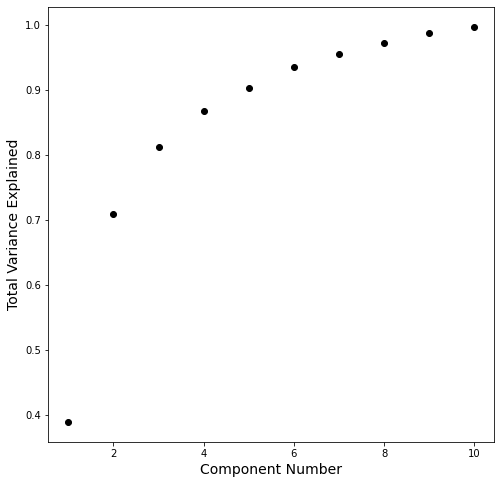

In [12]:
#Plot of explained variance for each principal component

exp_variance = pca.explained_variance_ratio_.cumsum()
print(exp_variance)

x_component = [1,2,3,4,5,6,7,8,9,10]

fig = plt.figure(figsize = (8,8))

plt.plot(x_component, exp_variance, 'o', color = 'black')
plt.xlabel('Component Number', fontsize=14)
plt.ylabel('Total Variance Explained', fontsize =14)
fig.savefig('figures/Total Variance Explained by component number', bbox='tight')

In [13]:

#This is required to calculate loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

#Each loading value is an indication of the correlation with the PC

loading_matrix = pd.DataFrame(loadings[:, :], columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7',
                                                        'PC8', 'PC9', 'PC10'], index=overlap_df['ID'])

display(loading_matrix)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ID,,,,,,,,,,
A5YKK6,0.975178,0.299461,0.086432,0.028618,0.011659,-0.095331,0.008446,0.129753,0.002175,0.102285
A6NHR9,-0.844236,0.403230,0.195823,-0.043243,-0.145859,0.090331,-0.008939,-0.218715,0.301938,0.050281
B0I1T2,-0.999908,0.070282,-0.155969,0.109049,-0.058384,0.033169,-0.086343,0.123330,0.075033,-0.129044
O00148,0.500529,-0.624526,-0.507300,0.033061,0.191108,0.292326,-0.115530,-0.114504,-0.200089,0.058554
O00151,0.628827,-0.826875,-0.014823,0.059218,0.043654,-0.051987,0.038993,-0.008465,0.010506,-0.027654
...,...,...,...,...,...,...,...,...,...,...
Q9Y6B6,0.821725,0.530662,-0.037061,-0.117589,0.082490,0.005726,0.053011,-0.014468,0.007740,-0.006557
Q9Y6C2,-0.305230,0.199576,-0.869635,0.108465,-0.349528,-0.251812,0.009469,0.040097,-0.044463,0.022483
Q9Y6C9,-0.800043,-0.061379,-0.235316,-0.101704,-0.433081,-0.340228,0.002042,-0.219241,0.148351,-0.071634


In [14]:
#proteins with highest correlations to PC1 and PC2 

PC1 = loading_matrix['PC1']
PC2 = loading_matrix['PC2']

PC1_max = PC1.idxmax()
PC2_max = PC2.idxmax() 

print('Protein with highest correlation to PC1:', PC1_max)
print('Protein with highest correlation to PC2:', PC2_max)

#PC1 = Q13405 39S ribosomal protein L49, mitochondrial
    #Mitochondrial translational elongation
    #mitochondrial translational termination
#PC2 = P07195 L-lactate dehydrogenase B chain
    #carbohydrate metabloic process and pyruvate metabolic process

Protein with highest correlation to PC1: Q13405
Protein with highest correlation to PC2: P07195


In [15]:
new_header = overlap_df_t.iloc[0]

overlap_df_t = overlap_df_t[1:] 

overlap_df_t.columns = new_header 

display(overlap_df_t)

ID,A5YKK6,A6NHR9,B0I1T2,O00148,O00151,O00160,O00170,O00194,O00217,O00231,...,Q9Y5S9,Q9Y5Y2,Q9Y5Z4,Q9Y678,Q9Y696,Q9Y6B6,Q9Y6C2,Q9Y6C9,Q9Y6E0,Q9Y6N5
NC1 Log2,-0.193547,-0.145977,-0.456015,-0.0432279,1.35588,-0.504926,0.318989,-0.692709,0.831626,0.947751,...,0.0816647,-0.169326,0.459006,1.36242,0.00903028,-2.09809,1.77249,0.279023,0.203452,1.47023
NC2 Log2,-0.168877,-0.0787086,-0.371589,-0.198784,1.35368,-0.480493,0.330484,-0.47801,0.695291,0.944686,...,0.0802093,-0.171062,0.493091,1.34454,-0.0435365,-2.11188,1.73378,0.283078,0.224487,1.44432
NC3 Log2,-0.0251992,-0.170041,-0.424671,-0.110602,1.3279,-0.539801,0.152286,0.20286,0.728017,0.925419,...,0.156727,-0.266782,0.376046,1.40308,0.132655,-1.45493,1.79844,0.261421,0.172691,1.48668
NC4 Log2,0.0580399,-0.147131,-0.501332,-0.166178,1.32522,-0.543286,0.159704,0.194398,0.690829,0.906768,...,0.129857,-0.280032,0.445284,1.41548,0.0982739,-1.42378,1.80632,0.249907,0.202531,1.49109
GC1 Log2,-0.0530616,-0.173992,-0.605081,-0.0550801,1.59521,-0.644178,0.350527,-0.265052,0.599435,0.929687,...,0.203608,-0.22337,0.520942,1.34923,0.0705686,-2.22608,1.71443,0.26365,0.415181,1.46283
GC2 Log2,0.304052,-0.298794,-0.878919,0.148954,1.60337,-0.617118,-0.0868026,0.618846,0.491655,0.79854,...,0.455492,-0.281291,0.395713,1.45252,0.211344,-0.937019,1.71199,0.128827,0.218727,1.54256
GC3 Log2,0.0890362,-0.261918,-0.754149,0.134185,1.64912,-0.457893,0.283533,0.0713432,0.48933,0.89451,...,0.379051,-0.212537,0.427585,1.35633,0.0495313,-1.42526,1.64349,0.148139,0.35433,1.47579
GC4 Log2,0.0686839,-0.229888,-0.705902,-0.0402603,1.60957,-0.575174,0.335341,0.0470026,0.5481,0.921507,...,0.247054,-0.1278,0.468853,1.39652,-0.0232632,-1.49439,1.74831,0.277505,0.273424,1.47932
PL1 Log2,-0.0295493,-0.160144,-0.467162,-0.311928,1.37515,-0.448461,0.327372,-0.469669,0.650079,0.950846,...,0.123997,-0.194597,0.419559,1.35028,0.015806,-2.11025,1.69183,0.234785,0.285392,1.37238
PL2 Log2,0.301525,-0.183454,-0.850963,-0.246245,1.3738,-0.613335,-0.108751,0.75847,0.506766,0.812168,...,0.294745,-0.406345,0.34251,1.4239,0.26499,-0.724834,1.71068,0.197977,0.0804997,1.52006


In [16]:
overlap_df_t.reset_index(inplace = True, drop = True)
display(overlap_df_t)

ID,A5YKK6,A6NHR9,B0I1T2,O00148,O00151,O00160,O00170,O00194,O00217,O00231,...,Q9Y5S9,Q9Y5Y2,Q9Y5Z4,Q9Y678,Q9Y696,Q9Y6B6,Q9Y6C2,Q9Y6C9,Q9Y6E0,Q9Y6N5
0,-0.193547,-0.145977,-0.456015,-0.0432279,1.35588,-0.504926,0.318989,-0.692709,0.831626,0.947751,...,0.0816647,-0.169326,0.459006,1.36242,0.00903028,-2.09809,1.77249,0.279023,0.203452,1.47023
1,-0.168877,-0.0787086,-0.371589,-0.198784,1.35368,-0.480493,0.330484,-0.47801,0.695291,0.944686,...,0.0802093,-0.171062,0.493091,1.34454,-0.0435365,-2.11188,1.73378,0.283078,0.224487,1.44432
2,-0.0251992,-0.170041,-0.424671,-0.110602,1.3279,-0.539801,0.152286,0.20286,0.728017,0.925419,...,0.156727,-0.266782,0.376046,1.40308,0.132655,-1.45493,1.79844,0.261421,0.172691,1.48668
3,0.0580399,-0.147131,-0.501332,-0.166178,1.32522,-0.543286,0.159704,0.194398,0.690829,0.906768,...,0.129857,-0.280032,0.445284,1.41548,0.0982739,-1.42378,1.80632,0.249907,0.202531,1.49109
4,-0.0530616,-0.173992,-0.605081,-0.0550801,1.59521,-0.644178,0.350527,-0.265052,0.599435,0.929687,...,0.203608,-0.22337,0.520942,1.34923,0.0705686,-2.22608,1.71443,0.26365,0.415181,1.46283
5,0.304052,-0.298794,-0.878919,0.148954,1.60337,-0.617118,-0.0868026,0.618846,0.491655,0.79854,...,0.455492,-0.281291,0.395713,1.45252,0.211344,-0.937019,1.71199,0.128827,0.218727,1.54256
6,0.0890362,-0.261918,-0.754149,0.134185,1.64912,-0.457893,0.283533,0.0713432,0.48933,0.89451,...,0.379051,-0.212537,0.427585,1.35633,0.0495313,-1.42526,1.64349,0.148139,0.35433,1.47579
7,0.0686839,-0.229888,-0.705902,-0.0402603,1.60957,-0.575174,0.335341,0.0470026,0.5481,0.921507,...,0.247054,-0.1278,0.468853,1.39652,-0.0232632,-1.49439,1.74831,0.277505,0.273424,1.47932
8,-0.0295493,-0.160144,-0.467162,-0.311928,1.37515,-0.448461,0.327372,-0.469669,0.650079,0.950846,...,0.123997,-0.194597,0.419559,1.35028,0.015806,-2.11025,1.69183,0.234785,0.285392,1.37238
9,0.301525,-0.183454,-0.850963,-0.246245,1.3738,-0.613335,-0.108751,0.75847,0.506766,0.812168,...,0.294745,-0.406345,0.34251,1.4239,0.26499,-0.724834,1.71068,0.197977,0.0804997,1.52006


<ipython-input-17-cc66c0b90589>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('Proteins Identified with Highest Correlation to PCs', bbox='tight')


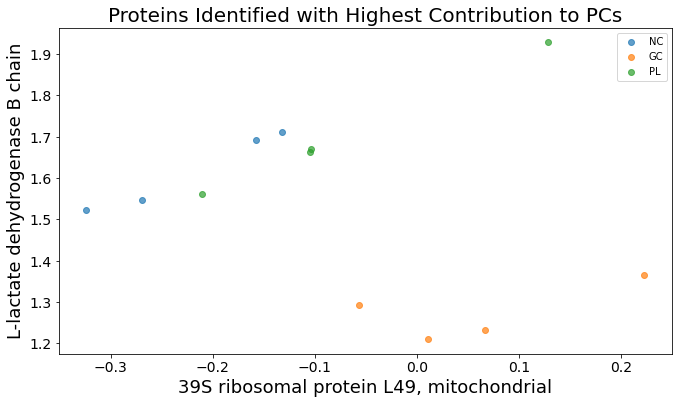

In [17]:
#Plot of proteins identified in loadings as having highest
#correlation with PC1 and PC2
#raw abundance data - not PCA transformed

fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1,1,1)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_xlabel('39S ribosomal protein L49, mitochondrial', fontsize = 18)
ax.set_ylabel('L-lactate dehydrogenase B chain', fontsize = 18)
ax.set_title('Proteins Identified with Highest Contribution to PCs', fontsize = 20)


disease = pd.DataFrame(['NC']*4 + ['GC']*4 + ['PL']*4, columns=['d'])
targets = ['NC', 'GC', 'PL']

# plot each tumor type label in different color
for target in targets:
    ind = disease['d'] == target
    ax.scatter(overlap_df_t.loc[ind,'Q13405']
               , overlap_df_t.loc[ind, 'P07195']
               , alpha=0.7)
    
ax.legend(targets, loc='best')
fig.savefig('figures/Proteins Identified with Highest Correlation to PCs', bbox='tight')

<ipython-input-18-1965d64c4d79>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('Two Component PCA with Filtered Data', bbox='tight')


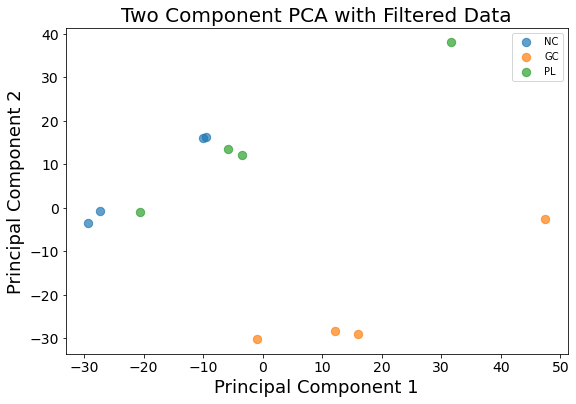

In [18]:
#Plot of PCA trandformed data for only proteins 
#found to overlap with activated PBMC dataset

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('Two Component PCA with Filtered Data', fontsize = 20)

disease = pd.DataFrame(['NC']*4 + ['GC']*4 + ['PL']*4, columns=['d'])
targets = ['NC', 'GC', 'PL']

# plot each tumor type label in different color
for target in targets:
    ind = disease['d'] == target
    ax.scatter(principalDF.loc[ind, 'principal component 1']
               , principalDF.loc[ind, 'principal component 2']
               , s=70,alpha=0.7);
    
ax.legend(targets, loc='best');
fig.savefig('figures/Two Component PCA with Filtered Data', bbox='tight')